# Position of a quasar

You measure the position of a quasar times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu$ = 1 (insuitable units), and the erorrs are $\sigma$ = 0.2

In [1]:
import numpy as np
import scipy.stats
import pylab as plt
import scipy.stats
import seaborn as sns
from scipy.stats import norm

## PART 1
### Monoschedastic case

### 1_a)
Generate fake measurements. Treat each of these observations as an estimate of the
true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i |\mu,\sigma)$.


-----------------------------------------------------------------------------
My comments:
Io so la distribuzione di probabilità dei miei parametri (media).In questo caso considero come parametro media la posizione misurata del quasar. Queste 'medie' seguono una distribuzione gaussiana.
Ma voglio la distribuzione di probabilità di tutto il mio set di dati.

Quindi in generale devo cercare la probabilità dei dati conoscendo il modello dei parametri, quindi trovare a Likelihood.
Devo fare il prodotto di $p(x_i |\mu,\sigma)$.

-----------------------------------------------------------------------------

[0.93437149 1.23452846 1.09232872 1.1830494  0.96320516]


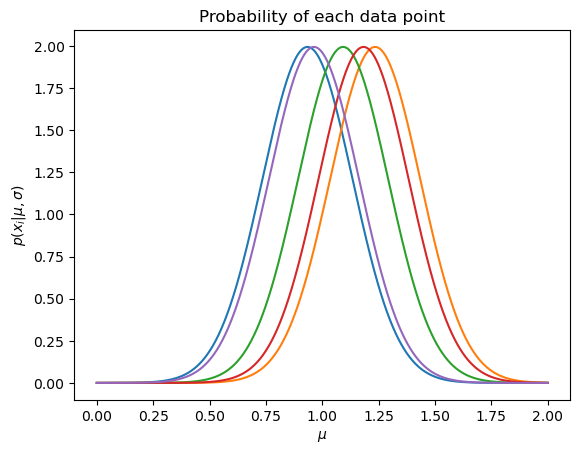

In [2]:
N=5
mean = 1
sigma = 0.2
n = 100

position_quasar =  norm(mean,sigma).rvs(N) #genera dati gaussianamente, con media mean = 1 e sigma = 0.2 (sample)
print(position_quasar)


xgrid= np.linspace(0,2,1000)
for i in range(0,N):
    p = scipy.stats.norm(loc=position_quasar[i], scale=sigma)
    plt.plot(np.linspace(0,2,1000), p.pdf(np.linspace(0,2,1000)),label ='N = %s' %i)
    plt.title('Probability of each data point')
    plt.xlabel('$\mu$')# le mu coincidono con le x della funzione
    plt.ylabel('$p(x_i |\mu,\sigma)$')
    
plt.show()

### 1_b)
Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset {$x_i$}). Make sure the x grid has enough points.

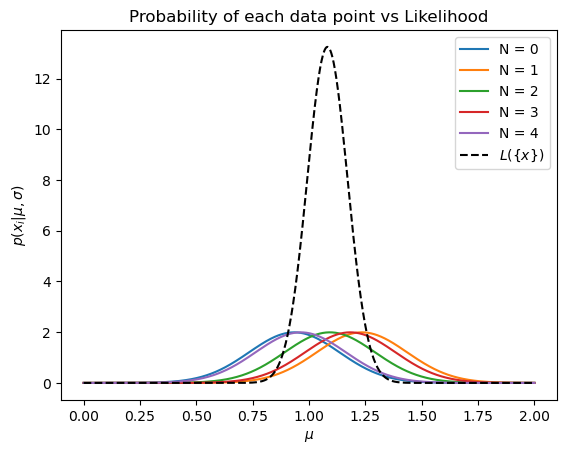

In [3]:
for i in range (0,N):
    p = scipy.stats.norm(loc=position_quasar[i], scale=sigma)
    plt.plot(np.linspace(0,2,1000), p.pdf(np.linspace(0,2,1000)), label ='N = %s' %i)

Ls = np.array([norm.pdf(xgrid,loc=s,scale=sigma) for s in position_quasar])
L = np.prod(Ls,axis=0)

plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')

plt.title('Probability of each data point vs Likelihood')
plt.xlabel('$\mu$')# le mu coincidono con le x della funzione
plt.ylabel('$p(x_i |\mu,\sigma)$')
plt.legend()


chiedo al prof perche se uso la riga di codice:

    -- Ls = np.array([norm.pdf(xgrid,loc=s,scale=sigma) for s in position_quasar]) --
invece se uso:

    -- p_xi =  np.array(p.pdf(np.linspace(0,2,1000))) + ciclo --
(esempio qui sotto) non funziona

for i in range (0,N):
    p = scipy.stats.norm(loc=position_quasar[i], scale=sigma)
    p_xi =  np.array(p.pdf(np.linspace(0,2,1000)))
    
L = np.prod(p_xi,axis=0)
plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')

### 1_c)
Just read off the maximum likelihood solution (e.g. using np.argsort )

In [4]:
sorted_indices = np.argsort(L) # preso un elemento chiamato "pivot" da una struttura dati (es. array) si pongono gli elementi minori a sinistra rispetto al pivot e gli elementi maggiori a destra. L'operazione viene quindi reiterata sui due insiemi risultanti fino al completo ordinamento della struttura. 
index_max = sorted_indices[-1]
print("Likelihood is maximized at %.3f" % xgrid[index_max])

Likelihood is maximized at 1.081


### 1_d)
Compare it with the MLE estimator derived above

For homoscedastic Gaussian, the maximum likelihood estimators is given by:

$$\sum_{i=1}^N x_i = \sum_{i=1}^N \hat \mu = N \hat \mu.$$

Thus we find that

$$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i,$$

In [5]:
MLest = np.mean(position_quasar)
print("The mean is my estimator", MLest)

The mean is my estimator 1.0814966471316811


## PART 2
### Monoschedastic case

Let's check this with a quick and dirty calculation on our quasar measurements. Implement the following:
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.


In general, the definition of the uncertainly on the mean is:

$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

In [6]:
# Here i am going to calculate the value of sigma_mu numerically.
# I'mmgoin to approximate the derivative.
sigma_mu = np.diff(np.log(L), n = 2) #n is equal to 2 because I wantthe 2° derivative
sigma_mu /= (xgrid[1] - xgrid[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[index_max]

print(sigma_mu)


0.08944271909996249


- Compare with the Fisher matrix error derived above

Fot the specific case of homoscedatsic gaussian, we have that the uncertainly on the mean is:

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

In [7]:
# Here i am going to calculate the value of sigma_mu analitically.
MLEsigma =sigma/N**0.5
print(MLEsigma)

0.08944271909999159


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

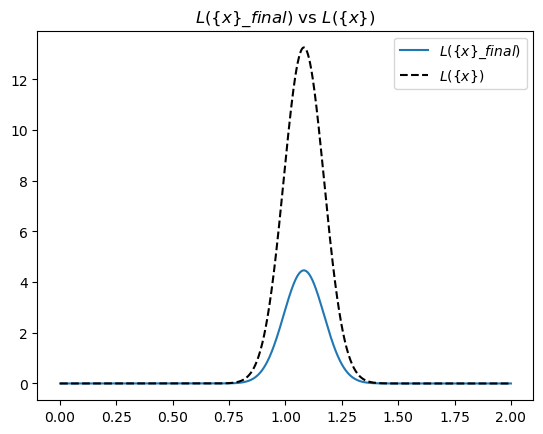

In [8]:
L_final = scipy.stats.norm(loc= MLest, scale=MLEsigma)

plt.plot(xgrid,L_final.pdf(xgrid), label=r'$L(\{x\}\_final)$')
plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')
plt.title('$L(\{x\}\_final)$ vs $L(\{x\})$')
plt.legend()
plt.show()

## PART 3 
### Heteroschedastic case

Let's make our model more realistic. Our N measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean 0.2 and standard deviation 0.05.

Generalize your code from above to this case

[0.97050602 0.92939684 1.12441427 1.21848726 1.3074215 ]


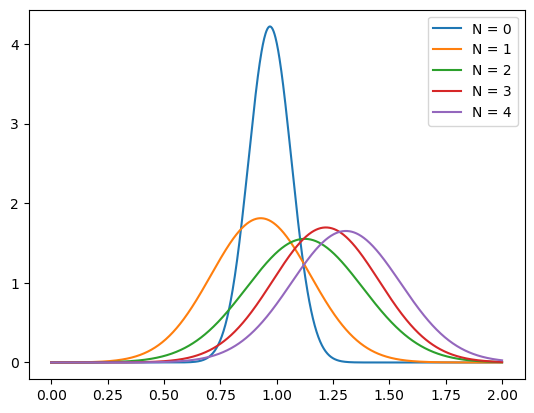

In [9]:
N=5
n = 100
mean = 1

#Generate heteroschedastic errors.
sigma = norm(0.2,0.05).rvs(N) # the sigma follows a distribution wiith mean = 0,2 and standard deviation = 0,05


position_quasar =  norm(mean,sigma).rvs(N) #genera dati gaussianamente, con media mean = 1 e sigma = 0.2 (sample)
print(position_quasar)


xgrid= np.linspace(0,2,1000)

for i in range(0,N):
    p = scipy.stats.norm(loc=position_quasar[i], scale=sigma[i])
    plt.plot(xgrid, p.pdf(xgrid), label ='N = %s' %i)
plt.legend() 
plt.show()

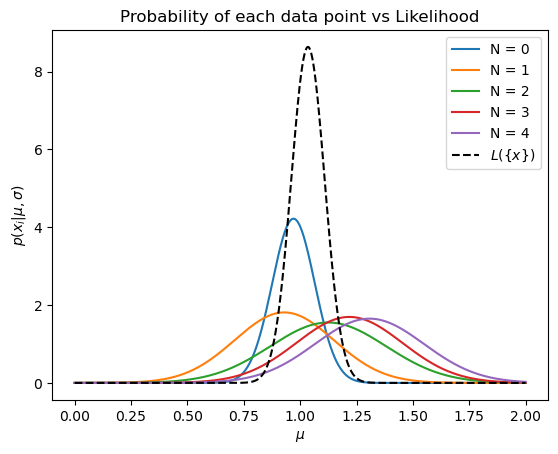

In [10]:
for i in range (0,N):
    p = scipy.stats.norm(loc=position_quasar[i], scale=sigma[i])
    plt.plot(xgrid, p.pdf(xgrid), label ='N = %s' %i)

Ls = np.array([norm.pdf(xgrid,loc=s,scale=ss) for s,ss in zip(position_quasar,sigma)])
L = np.prod(Ls,axis=0)

plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')

plt.title('Probability of each data point vs Likelihood')
plt.xlabel('$\mu$')# le mu coincidono con le x della funzione
plt.ylabel('$p(x_i |\mu,\sigma)$')
plt.legend()


In [11]:
sorted_indices = np.argsort(L) # preso un elemento chiamato "pivot" da una struttura dati (es. array) si pongono gli elementi minori a sinistra rispetto al pivot e gli elementi maggiori a destra. L'operazione viene quindi reiterata sui due insiemi risultanti fino al completo ordinamento della struttura. 
index_max = sorted_indices[-1]
print("Likelihood is maximized at %.3f" % xgrid[index_max])

Likelihood is maximized at 1.035


For heteroscedastic Gaussian, the maximum likelihood estimators is given by:
$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\hat \mu}{\sigma_i^2},$$

then
$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)}.$$

In [12]:
MLest = np.average(position_quasar, weights= 1/sigma**2)
print("The mean is my estimator", MLest)

The mean is my estimator 1.0346972762585933


In general, the definition of the uncertainly on the mean is:

$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

In [13]:
# Here i am going to calculate the value of sigma_mu numerically.
# I'mmgoin to approximate the derivative.
sigma_mu = np.diff(np.log(L), n = 2) #n is equal to 2 because I wantthe 2° derivative
sigma_mu /= (xgrid[1] - xgrid[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[index_max]

print(sigma_mu)


0.07394520982262824


Fot the specific case of heteroscedastic gaussian, we have that the uncertainly on the mean is:

$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

In [14]:
# Here i am going to calculate the value of sigma_mu analitically.
MLEsigma =1/(np.sum(1/sigma))**0.5
print(MLEsigma)

0.19102914967513646


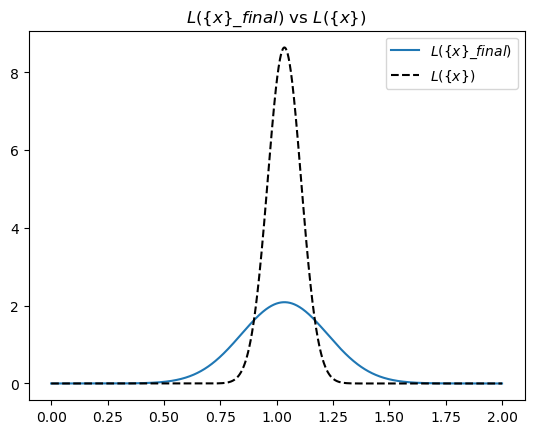

In [15]:
L_final = scipy.stats.norm(loc= MLest, scale=MLEsigma)

plt.plot(xgrid,L_final.pdf(xgrid), label=r'$L(\{x\}\_final)$')
plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')
plt.title('$L(\{x\}\_final)$ vs $L(\{x\})$')
plt.legend()
plt.show()